# Module 01: Jupyter Notebook Assignment

## Due: 2021-09-03

## Name: Abby Sigurdson

### Part I: Instructions

In this part of the assignment, your task is to create a one-dimensional random walk model similar to the one in [the example notebook](./mod01-PythonIntro-1.ipynb) with the following parameters:

* `Nt` = 200
* `mu_x` = 1.5
* `s_x` = 2.1
* `min_x` = 1.25

Where `min_x` is a new parameter that is the _minimum step size_ at each step in the random walk. When you calculate the step size at each step, you will only accept values that are larger than `min_x` by using a `while` loop to keep generating step sizes until the step size exceeds `min_x`. Do this for `Nx` = 1,000 random walkers. 

___Deliverables:___ 

1. Code to create the random walk with comments
2. Reproduce the 2 figures in section 5.1 and 5.2 of the example notebook (__Note__: you will have to adjust the `bins` and `range` parameters provided to histogram). 

Text(0, 0.5, 'Frequency [-]')

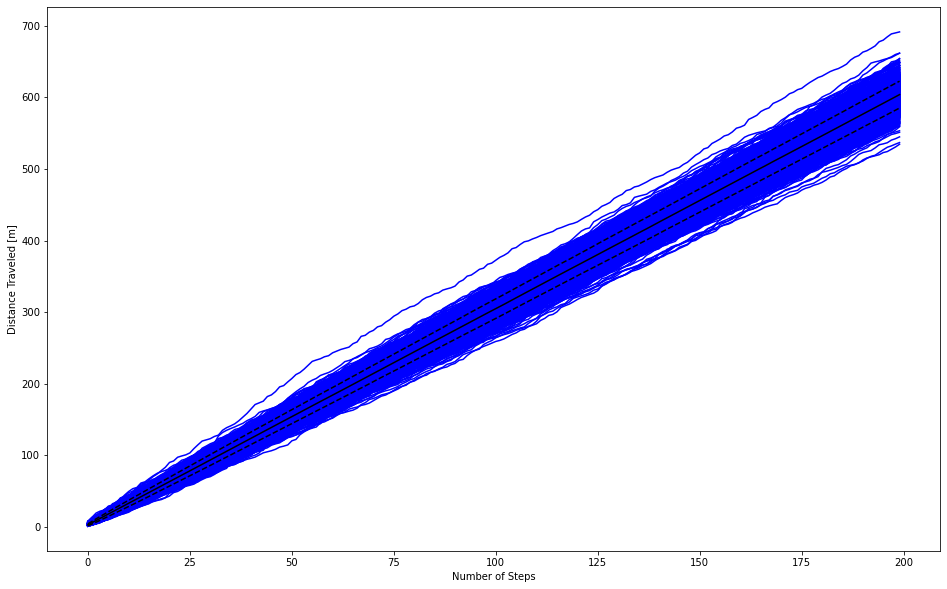

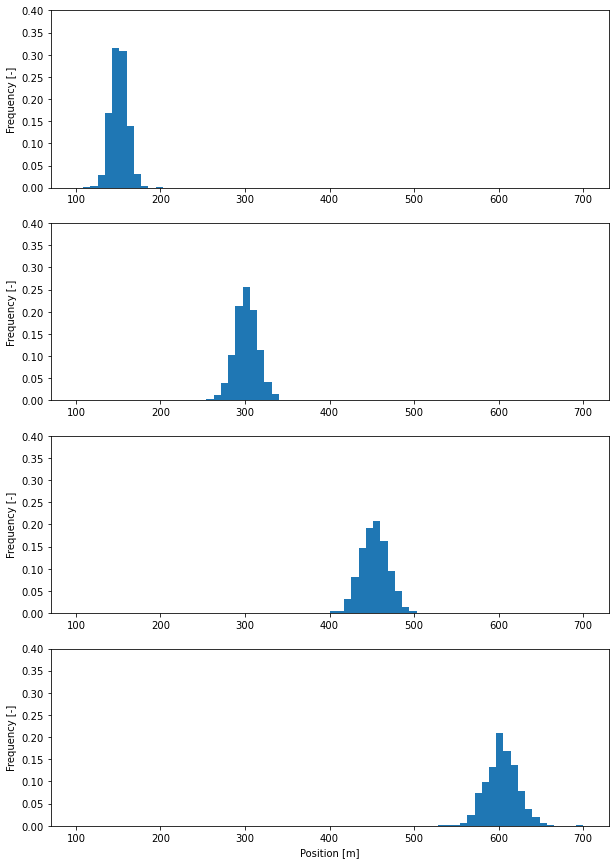

In [17]:
import numpy as np
import matplotlib.pyplot as plt

Nt = 200 # This is the number of steps (or time steps) in our Random Walk
Nx = 1000 # Number of walkers 

mu_x = 1.5 # The average step size in our random walk
s_x = 2.1 # The standard deviation of the step size in our random walk
min_x = 1.25 # The minimum step size


X = np.zeros((Nt,Nx)) # The container for all walkers at each time step

for i in np.arange(Nt): # For loop for each time step
    
    for j in np.arange(Nx): # For loop for each walker
        
        x_i = 0
            
        while x_i < min_x: # Stays in while loop until it is greater than min_x and then goes to if statment
            
            x_i = s_x*np.random.randn() + mu_x # Step size for the j^th walker at the i^th time step
        
        if(i==0): # Check to see if at first time step
        
            X[i,j] = 0.0 + x_i # If at the first time step, the initial position was 0
    
        else:
            # If at a subsequent time step, the initial position was the position at the previous time step 
            X[i,j] = X[i-1,j] + x_i 

mean_X = np.mean(X,axis=1) # The average distance of all walkers through time
std_X = np.std(X,axis=1) # The standard deviation of all walkers through time

# Graph for 5.1

plt.figure(figsize=(16,10)) 

plt.plot(np.arange(Nt),X,'b-') # Plot of the location of all walkers versus time as blue lines
plt.plot(np.arange(Nt),mean_X,'k-') # Plot of the location of all walkers versus the average distance of all walkers as a black line
plt.plot(np.arange(Nt),mean_X + std_X, 'k--') # The same as the second command but the upper limit due to the standard deviation as a black dashed line
plt.plot(np.arange(Nt),mean_X - std_X, 'k--') # The same as the second command but the lower limit due to the standard deviation as a black dashed line
plt.xlabel('Number of Steps') 
plt.ylabel('Distance Traveled [m]') 

# Graph for 5.2

x_50, be_50 = np.histogram(X[49,:], bins=70, range=(100,700)) # The frequency of walkers at time step of 50
x_100, be_100 = np.histogram(X[99,:], bins=70, range=(100,700)) # The frequency of walkers at time step of 100
x_150, be_150 = np.histogram(X[149,:], bins=70, range=(100,700)) # The frequency of walkers at time step of 150
x_200, be_200 = np.histogram(X[-1,:], bins=70, range=(100,700)) # The frequency of walkers at time step of 200

plt.figure(figsize=(10,15)) 
plt.subplot(4,1,1)
plt.bar((be_50[1:]+be_50[:-1])/2, (x_50/np.sum(x_50)), width=(be_50[1]-be_50[0])) # The plot of the position and frequency at time step 50
plt.ylim((0.0,0.4))
plt.ylabel('Frequency [-]')

plt.subplot(4,1,2)
plt.bar((be_100[1:]+be_100[:-1])/2, (x_100/np.sum(x_100)), width=(be_100[1]-be_100[0])) # The plot of the position and frequency at time step 100
plt.ylim((0.0,0.4))
plt.ylabel('Frequency [-]')

plt.subplot(4,1,3)
plt.bar((be_150[1:]+be_150[:-1])/2, (x_150/np.sum(x_150)), width=(be_150[1]-be_150[0])) # The plot of the position and frequency at time step 150
plt.ylim((0.0,0.4))
plt.ylabel('Frequency [-]')

plt.subplot(4,1,4)
plt.bar((be_200[1:]+be_200[:-1])/2, (x_200/np.sum(x_200)), width=(be_200[1]-be_200[0])) # The plot of the position and frequency at time step 200
plt.ylim((0.0,0.4))
plt.xlabel('Position [m]')
plt.ylabel('Frequency [-]')

### Part II: Instructions

In this part of the assignment, your task is to create a __two-dimensional__ random walk model. The 2-D random walk is just an extension of the 1-D random walk into a second dimension. Assume that at each step in the random walk, the step size in the x- and y-directions are _independent_ of one another. That is, you do not need to know anything about the step size in the x-direction to calculate the step size in the y-direction and vice versa. Use the following parameters:

* Nt = 300
* Nx = 3
* mu_x = 0.5
* s_x = 1.5
* mu_y = 5.0
* s_y = 2.5

Where `mu_y` and `s_y` are, respectively, the average and standard deviation of the step size in the y-direction.

___Deliverables___

1. Code to create the random walk with comments
2. Plot the position of all three random walkers at each step of their respective random walks on the ___same plot___.

Text(0, 0.5, 'Y Position')

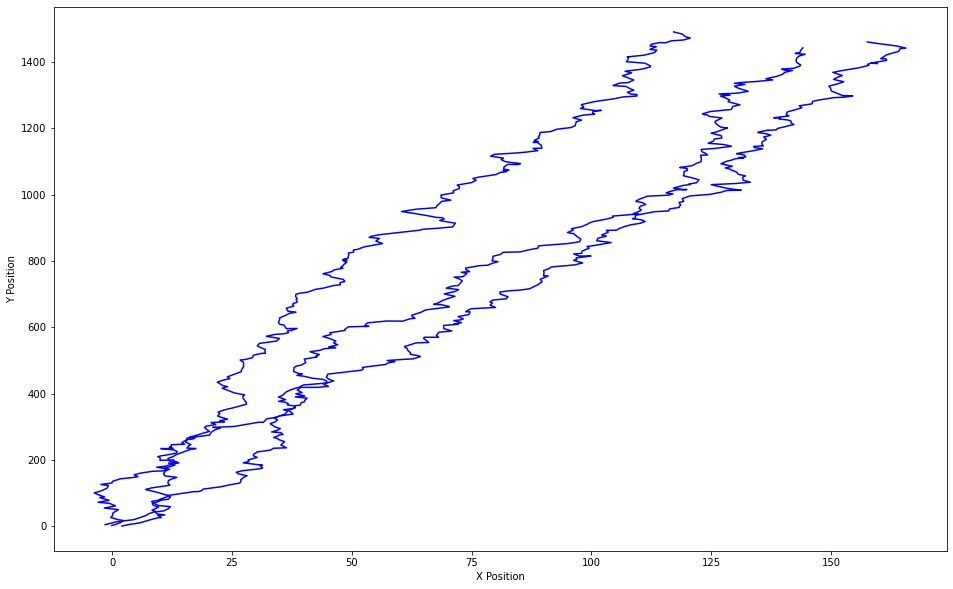

In [23]:
Nt = 300 # Number of time steps
Nx = 3 # Number of walkers

mu_x = 0.5 # Average step size in the x direction
s_x = 1.5 # The standard deviation of the step size in the x direction
mu_y = 5.0 # Average step size in the y direction
s_y = 2.5 # The standard deviation of the step size in the x direction

X = np.zeros((Nt,Nx)) # The container for all walkers at each time step

for i in np.arange(Nt): # For loop for each time step
    
    for j in np.arange(Nx): # For loop for each walker
        
        x_i = s_x*np.random.randn() + mu_x # Step size for the j^th walker at the i^th time step
        
        if(i==0): # Check to see if at first time step
        
            X[i,j] = 0.0 + x_i # If at the first time step, the initial position was 0
    
        else:
            # If at a subsequent time step, the initial position was the position at the previous time step 
            X[i,j] = X[i-1,j] + x_i 
            
Y = np.zeros((Nt,Nx)) # The container for all walkers at each time step

for i in np.arange(Nt): # For loop for each time step
    
    for j in np.arange(Nx): # For loop for each walker
        
        y_i = s_y*np.random.randn() + mu_y # Step size for the j^th walker at the i^th time step
        
        if(i==0): # Check to see if at first time step
        
            Y[i,j] = 0.0 + y_i # If at the first time step, the initial position was 0
    
        else:
            # If at a subsequent time step, the initial position was the position at the previous time step 
            Y[i,j] = Y[i-1,j] + y_i 

plt.figure(figsize=(16,10)) 
plt.plot(X,Y,'b-') # Plot of position of the three random walks
plt.xlabel('X Position') 
plt.ylabel('Y Position') 